In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
import os

# In[50]:
import tensorflow_datasets as tfds


from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,SeparableConv2D
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
gpus = tf.config.list_physical_devices("GPU")[0]
tf.config.experimental.set_memory_growth(gpus, True)

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 6s 1us/step


In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[ train_labels[0] ]

'Ankle boot'

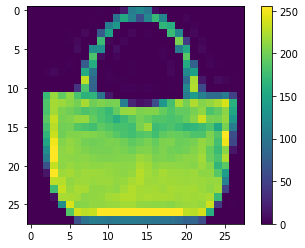

In [153]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [155]:
predict_data = train_images[100]

In [33]:

def decode_img(img_raw):
    img_tensor = tf.image.decode_jpeg(img_raw, channels=3)
    print(img_tensor.shape)
    #img_tensor = (img_tensor/127.5) - 1
    tf_fianl = tf.image.resize(img_tensor, [160, 160])

    # 格式化0-1
    img = tf.image.convert_image_dtype(tf_fianl, tf.float32)
    img = (img / 127.5) - 1
    return img


def process_path(file_path):
    label = get_label(file_path)[0]
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label


def get_label(file_path):
    # convert the path to a list of path components
    parts = tf.strings.split(file_path, os.path.sep)
    # The second to last is the class-directory
    return parts[-2] == label_name
data_root_orig = "/data/cats_and_dogs_filtered/train//"
data_root = pathlib.Path(data_root_orig)

test_data_path = "/data/cats_and_dogs_filtered/validation/"
test_path = pathlib.Path(test_data_path)

test_image_path = list(test_path.glob('*/*'))
test_image_path = [str(path) for path in test_image_path]

traing_image_path = list(data_root.glob('*/*'))
traing_image_path = [str(path) for path in traing_image_path]

label_name = sorted(item.name for item in test_path.glob('*/')
                    if item.is_dir())



(153, 159, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


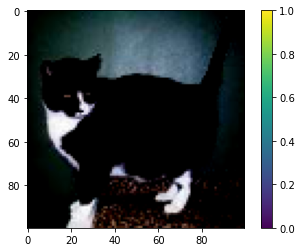

In [4]:
a = tf.io.read_file(traing_image_path[0]).numpy()
d = decode_img(a)

d = d.numpy()
#d = d.reshape(32,32,3).tolist()
#d
plt.figure()
plt.imshow(d)
plt.colorbar()
#plt.grid(False)
plt.show()

In [22]:
pre_dict = list()
for a in traing_image_path[::-100]:
    print(a)
    a = tf.io.read_file(a).numpy()
    
    d = decode_img(a)
    d = d.numpy()
    d = d.reshape(1,100,100,3).tolist()
    pre_dict.append(d)

/data/cats_and_dogs_filtered/train/dogs/dog.587.jpg
(290, 259, 3)
/data/cats_and_dogs_filtered/train/dogs/dog.686.jpg
(499, 500, 3)
/data/cats_and_dogs_filtered/train/dogs/dog.541.jpg
(376, 500, 3)
/data/cats_and_dogs_filtered/train/dogs/dog.345.jpg
(500, 489, 3)
/data/cats_and_dogs_filtered/train/dogs/dog.751.jpg
(499, 284, 3)
/data/cats_and_dogs_filtered/train/dogs/dog.35.jpg
(243, 323, 3)
/data/cats_and_dogs_filtered/train/dogs/dog.729.jpg
(375, 499, 3)
/data/cats_and_dogs_filtered/train/dogs/dog.880.jpg
(467, 499, 3)
/data/cats_and_dogs_filtered/train/dogs/dog.432.jpg
(382, 349, 3)
/data/cats_and_dogs_filtered/train/dogs/dog.40.jpg
(197, 149, 3)
/data/cats_and_dogs_filtered/train/cats/cat.926.jpg
(309, 319, 3)
/data/cats_and_dogs_filtered/train/cats/cat.384.jpg
(375, 499, 3)
/data/cats_and_dogs_filtered/train/cats/cat.391.jpg
(200, 179, 3)
/data/cats_and_dogs_filtered/train/cats/cat.15.jpg
(353, 405, 3)
/data/cats_and_dogs_filtered/train/cats/cat.47.jpg
(214, 258, 3)
/data/cats_and

In [194]:
# # shuffle the data
# pre_dict = pre_dict[::-10]
len(pre_dict)

20

In [5]:
traing_ds = tf.data.Dataset.from_tensor_slices(traing_image_path).map(process_path).shuffle(buffer_size=2000).batch(batch_size=100).repeat()
validation_ds = tf.data.Dataset.from_tensor_slices(test_image_path).map(process_path).shuffle(buffer_size=2000).batch(batch_size=100).repeat()

# for i in traing_ds.take(100):
#     c = i[0]
#     print(i[1])
#     plt.figure()
#     plt.imshow(c)
#     plt.colorbar()
#     #plt.grid(False)
#     plt.show()


(None, None, 3)
(None, None, 3)


In [31]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(SeparableConv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(SeparableConv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

In [32]:
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 158, 158, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 79, 79, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 79, 79, 32)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 77, 77, 64)        2400      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 36, 36, 128)       8896      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 128)      

In [10]:
history =model.fit(traing_ds,epochs=10, 
                   steps_per_epoch=1000,
                   validation_data=validation_ds, 
                   validation_steps=5)


Train for 1000 steps, validate for 5 steps
Epoch 1/10
1000/1000 [==============================] - 85s 85ms/step - loss: 1.5713 - accuracy: 0.6135 - val_loss: 0.7519 - val_accuracy: 0.5798
Epoch 2/10
1000/1000 [==============================] - 83s 83ms/step - loss: 0.4924 - accuracy: 0.7474 - val_loss: 1.0161 - val_accuracy: 0.7070
Epoch 3/10
1000/1000 [==============================] - 83s 83ms/step - loss: 0.3801 - accuracy: 0.8589 - val_loss: 0.6886 - val_accuracy: 0.5994
Epoch 4/10
1000/1000 [==============================] - 82s 82ms/step - loss: 0.5250 - accuracy: 0.7352 - val_loss: 1.1392 - val_accuracy: 0.6684
Epoch 5/10
1000/1000 [==============================] - 82s 82ms/step - loss: 0.3701 - accuracy: 0.8429 - val_loss: 1.3224 - val_accuracy: 0.7110
Epoch 6/10
1000/1000 [==============================] - 82s 82ms/step - loss: 0.2122 - accuracy: 0.9398 - val_loss: 2.4670 - val_accuracy: 0.6792
Epoch 7/10
1000/1000 [==============================] - 82s 82ms/step - loss: 0.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[[-0.40337252616882324, -0.034745097160339355, -0.3797646760940552], [-0.3490588068962097, 0.011725425720214844, -0.2940784692764282], [-0.3565881848335266, 0.004156827926635742, -0.27807843685150146], [-0.4116078019142151, -0.01945096254348755, -0.31745094060897827], [-0.3803136944770813, -0.035215675830841064, -0.24690192937850952], [-0.3333333134651184, 0.011725425720214844, -0.24698036909103394], [-0.2472941279411316, 0.10552942752838135, -0.23152947425842285], [-0.3097647428512573, 0.05082345008850098, -0.25486278533935547], [-0.2549803853034973, 0.12129414081573486, -0.2549803853034973], [-0.3176862597465515, 0.07423532009124756, -0.38827449083328247], [-0.396117627620697, -0.043176472187042236, -0.5059216022491455], [-0.3803921341896057, -0.027450978755950928, -0.4745097756385803], [-0.3491765260696411, -0.011921584606170654, -0.3648627996444702], [-0.25517648458480835, 0.08207845687866211, -0.27086275815963745], [-0.2943137288093567, 0.03509807586669922, -0.2628627419471741],

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


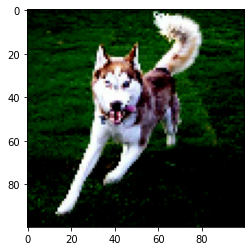

In [28]:
# pre_data = model.predict(pre_dict[0])
#np.argmax(pre_data)
print(pre_dict[1])
plt.imshow(pre_dict[1][0])
for i in pre_dict:
    pre_data = model.predict(pre_dict[0])
    print(np.argmax(pre_data))

In [6]:
clothing_model = models.Sequential([
   Flatten(input_shape=(28, 28)),
   Dense(128, activation='relu'),
   Dense(10)
])
clothing_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
cloese_model.summary()

NameError: name 'cloese_model' is not defined

In [163]:
clothing_model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 135us/sample - loss: 3.0332 - accuracy: 0.6874
Epoch 2/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.7095 - accuracy: 0.7333
Epoch 3/10
60000/60000 [==============================] - 8s 142us/sample - loss: 0.6228 - accuracy: 0.7658
Epoch 4/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.5515 - accuracy: 0.8070
Epoch 5/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.5081 - accuracy: 0.8236
Epoch 6/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.5090 - accuracy: 0.8251
Epoch 7/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.4840 - accuracy: 0.8321
Epoch 8/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.4808 - accuracy: 0.8353
Epoch 9/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.4845 - accuracy: 0.8337
Epoch

In [164]:
clothing_model.evaluate(test_images, test_labels, steps=1000)

10000/10000 [==============================] - 3s 294us/sample - loss: 0.5523 - accuracy: 0.8289


[0.5522925056931562, 0.8289]

In [165]:

predict_data = predict_data.reshape(1,28,28)
print(predict_data.shape)
data_pre = cloese_model.predict(predict_data)
pre_num = np.argmax(data_pre)
print(pre_num)
class_names[pre_num]

(1, 28, 28)
3


'Dress'

In [168]:
new_model = models.Sequential([
   
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(100, 100 ,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])
new_model.summary()
new_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 128)     

In [9]:
history =new_model.fit(traing_ds,epochs=10, steps_per_epoch=1000,validation_data=validation_ds, validation_steps=5)


NameError: name 'new_model' is not defined

In [170]:
new_model.evaluate(validation_ds, steps=100)


100/100 [==============================] - 7s 66ms/step - loss: 2.4437 - accuracy: 0.7240


[2.4437484443187714, 0.724]

       loss  accuracy  val_loss  val_accuracy
0  1.571287  0.613505  0.751901        0.5798
1  0.492358  0.747377  1.016150        0.7070
2  0.380113  0.858880  0.688601        0.5994
3  0.524990  0.735220  1.139164        0.6684
4  0.370084  0.842891  1.322360        0.7110
5  0.212234  0.939833  2.466983        0.6792
6  0.042416  0.990465  2.604707        0.7096
7  0.004372  0.999569  2.689076        0.7162
8  0.015655  0.996934  3.035367        0.7148
9  0.034369  0.993434  2.319463        0.6692


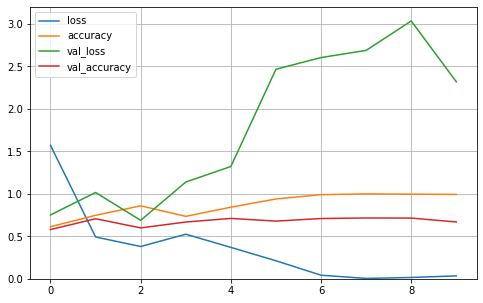

In [20]:
import matplotlib.pyplot as plt

def plot_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    print(pd.DataFrame(history.history))
    plt.grid(True)
    plt.gca().set_ylim(0,3.2)
    plt.show()
plot_curves(history)

# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(10)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()
# acc = new_model.history.history['accuracy']
# val_acc = new_model.history.history['val_accuracy']

# loss = new_model.history.history['loss']
# val_loss = new_model.history.history['val_loss']

# epochs_range = range(10)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()